In [1]:
# Import the Libararies
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# Scaling

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))  #(28*28 = 784)Return the product of array elements over a given axis.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



In [5]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [6]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))


hidden_1 = Dense(128, activation='relu')(input_img)
hidden_2 = Dense(64, activation='relu')(hidden_1)

code = Dense(code_size, activation='relu')(hidden_2)

hidden_3 = Dense(64, activation='relu')(code)
hidden_4 = Dense(128, activation='relu')(hidden_3)

output_img = Dense(input_size, activation='sigmoid')(hidden_4)

autoencoder = Model(input_img, output_img)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')




In [7]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 14ms/step - loss: 0.2456 - val_loss: 0.1674
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1504 - val_loss: 0.1359
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1313 - val_loss: 0.1246
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1222 - val_loss: 0.1176
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1165 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1121 - val_loss: 0.1086
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1083 - val_loss: 0.1057
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1056 - val_loss: 0.1029
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1031 - val_loss: 0.1012
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1013 - val_lo

In [8]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
       
    plt.show()


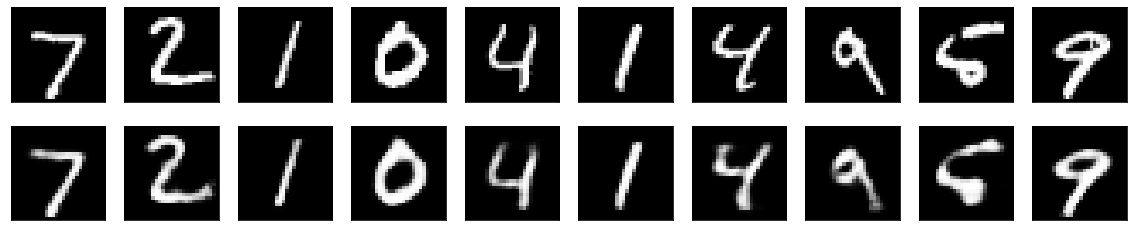

In [9]:
plot_autoencoder_outputs(autoencoder, 10, (28, 28))